## 计算机算术 | Computer Arithmetic

在数值计算中，系统性地出现两种误差来源：
1. 截断误差（Truncation errors）
    - 由于数学模型的简化（例如，离散化、用有限差分代替导数）所致。
2. 舍入误差（Rounding errors）
    - 由于在计算机中无法精确表示实数所致
    > it is impossible to represent real numbers exactly in a computer

---

### 数值计算 | Numerical Computation

> 使用计算机近似求解数学问题的方法。
>
> The use of computers to approximate solutions to mathematical problems.

例如求解微分方程、优化问题或积分计算。由于许多数学问题无法得到解析解（即精确的公式解），我们依赖数值方法（如迭代算法或离散化）来获得近似解。
> Many mathematical problems lack analytical solutions (i.e., exact formula-based solutions), so we rely on numerical methods (e.g., iterative algorithms or discretization) to obtain approximate results.

然而，这些方法不可避免地引入误差，主要分为**截断误差**和**舍入误差**。

#### 1. 截断误差（Truncation Errors）

> 源于对数学模型的简化或近似处理。
> 
> Arise from the simplification or approximation of mathematical models.

在数值计算中，我们经常将连续问题（如微分方程）转换为离散问题（如差分方程），以便计算机处理。
> In numerical computation, we often convert continuous problems (e.g., differential equations) into discrete problems (e.g., difference equations) to make them computable.

这种转换会丢失一些信息，导致误差。

> 截断误差通常与步长或近似阶数相关。
>
> Truncation errors are typically related to step size or approximation order.

#### 2. 舍入误差（Rounding Errors）

> 由于计算机无法精确表示所有实数所致。
>
> Computers cannot represent all real numbers exactly.

计算机使用有限位数的二进制表示数字（如浮点数标准 IEEE 754），这导致某些数字（如无理数或循环小数）必须被舍入到最接近的可表示值。

> 舍入误差是系统性的，可能在迭代算法中累积，导致结果偏离真实值。
>
> Rounding errors are systematic and can accumulate in iterative algorithms, causing results to deviate from true values.


---

## Integers Arithmetic | 整数算术

In Python integers can be arbitrarily large.<br>
The interpreter simply uses as many bits as needed to represent the number.

In [1]:
a = 1
a.bit_length()

1

In [2]:
a = 10 ** 100
a.bit_length()

333

In [3]:
a = 10 ** 30003
a.bit_length()

99668

NumPy 不兼容 Python 的可扩展整数
> Numerical packages such as NumPy are not compatible with this extensible integer type

核心：NumPy 的核心设计目标（高速的批量数组运算）与 Python 可变长整数带来的开销和不确定性存在根本性冲突。

NumPy 使用固定数量的比特位来存储整数，通常是 32 位（np.int32）或 64 位（np.int64，默认值）。<br>
超出最大取值范围的运算会产生溢出（超出固定范围的比特位被截断）。
> NumPy uses a fixed number of bits to store integers, usually 32 bits (np.int32) or 64 bits (np.int64, default).<br>
> Computations outside the maximum range of values generate overflows (truncation of the bits outside the fixed range).


In [4]:
import numpy as np

In [5]:
print(np.iinfo(np.int64))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



---

## Floating-point Arithmetic | 浮点数算术

In a computer, a real number $x\ne 0$ is represented as:
$$
x = \pm n \times b^e
$$
- $\pm$：符号位（Sign）
  - `0`代表正数，`1`代表负数。
- $n$：尾数/有效数字（Mantissa/Significand）
  - 数字的精度部分。
  - 一个规范化的小数（fractional part），通常满足：$$1 \le n < b$$
- $b = 2$：基数（The base）
  - 通常是 `2`（二进制）
- $e$：指数（The exponent）
  - 决定了数的范围（数量级）。

<img src="./image/float_binary.png" alt="image.png" style="width: 700px; height: auto; display: block; margin: 0 auto;"><br>

<img src="./image/float_16bits_demo.png" alt="image.png" style="width: 700px; height: auto; display: block; margin: 0 auto;">


---

In [6]:
print(0.1 + 0.1 + 0.1 == 0.3)

False


In [7]:
print(0.1)
print(format(0.1, ".50g"))

0.1
0.1000000000000000055511151231257827021181583404541


In [8]:
(0.1).as_integer_ratio()

(3602879701896397, 36028797018963968)

In [9]:
print(3602879701896397 / 36028797018963968)

0.1


---

For real numbers, Python uses 64 bits:

It can represent real numbers from $\pm\mathbf{2.23\times10^{-308}}$ to $\pm\mathbf{1.80\times10^{308}}$

- If $x$ is smaller than $m=2.23\times10^{-308}$, we get an ***underflow***
- If $x$ is greater than $M=1.80\times10^{308}$, we get an ***overflow***


In [10]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



---

### 机器精度 | Machine Precision

机器精度是满足 $\text{float}(1 + \epsilon_1) > 1$ 的最小正数 $\varepsilon_1$。
> The machine precision of a floating point arithmetic is defined as the smallest positive number $\varepsilon_1$ such that $\text{float}(1 + \epsilon_1) > 1$


In [11]:
print(np.spacing(1))

2.220446049250313e-16


`np.space(1)`: 
- 在浮点数系统中，表示比 $x$ 大的、最邻近 $x$ 的那个数，与 $x$ 本身之间的绝对差值。
- In the floating-point system, the absolute difference between $x$ and the next largest representable floating-point number.

> 在 $x$ 这个位置，浮点数之间的“最小步长”或“绝对间隔”<br>
> the "minimum step size" or the "absolute interval" between floating-point numbers at the location $x$.

在计算机中，由于用有限的内存（通常是64位）来表示无限多的实数，所以浮点数在数轴上的分布是离散的，而不是连续的。<br>
数字越大，相邻两个可表示的浮点数之间的“间隔”就越大。

> In computing, because we use a finite amount of memory (typically 64 bits) to represent an infinite set of real numbers, floating-point numbers are discrete on the number line, not continuous. <br>
> The larger the number, the larger the "gap" or "interval" between two adjacent representable floating-point numbers.

#### 金融数值计算的实际意义

处理大金额时需要格外小心：如果你计算1亿美金（$10^8$）的期权价格，绝对精度间隔是：

```
ε ≈ 10⁸ × 1.57 × 10⁻¹⁶ ≈ 1.57 × 10⁻⁸ ≈ 0.0000000157
```

这意味着价格变化小于这个量级时可能被"淹没"。

- 算法稳定性分析：在设计数值算法时，必须考虑当前计算规模的精度限制。
- 变量缩放策略：有时需要将问题缩放到"单位量级"附近进行计算，以最大化精度。

---

### 不等间距网格

**浮点数精度的根本性质：绝对误差随着数值增大而线性增大。**

浮点数（在数轴上的分布不是均匀的，而是对数尺度的。）

- 在`0`附近，数字非常密集，间隔很小（例如，小数的精度高）。
- 随着数值变大，间隔逐渐变大（稀疏）（网格变粗糙）。

这是因为浮点数使用科学计数法：$(-1)^s \times m \times 2^e$
- $s$：符号位
- $m$：尾数
- $e$：指数，间隔由指数决定。

当指数`e`增加时，相邻数字之间的差值（即`np.spacing`）会乘以`2`的幂次。<br>


#### 金融工程含义

精度损失的风险分布不均匀
- 在价格接近0的资产（如深度虚值期权）计算中，相对精度较高
- 在大金额计算（如机构级交易）中，绝对误差可能显著放大
```py
# 不好的做法：直接处理极大数值
large_value = 1e8  # 1亿美元
result = large_value + 0.01  # 这个加法可能被"淹没"

# 更好的做法：缩放处理
scaled_value = 1.0  # 以百万为单位
result = scaled_value + 0.01/1e6  # 在单位尺度下计算
```

---

### 浮点数舍入：几何级数 | Float rounding: Geometric series

几何级数 $$\sum_{p=-10}^{10}10^p = (10^{10}-10^{-10})/9$$ 在数学上是精确的等式。这个级数包含从 $10^{-10}$ 到 $10^{10}$ 的`21`项。


In [12]:
print((10 ** 10 - 10 ** (-10)) / 9)

1111111111.1111112


1. 大数与小数的相减（相差`20`个数量级）
2. 精度丢失
    - 在64位浮点数中，当两个相差巨大的数相减时，较小数的有效数字会被舍入
3. 二进制表示限制
    - $10^{-10}$ 在二进制中是无限循环小数，无法精确表示

---

#### 高精度

decimal模块的优势:
- 任意精度计算
- 十进制表示，避免二进制舍入误差
- 精确处理极大和极小的数值

> 但是，和 Numpy 不兼容。<br>
> 计算速度较慢<br>
> 需要手动管理精度设置

In [13]:
from decimal import Decimal

In [14]:
a = Decimal(10)
b = Decimal(-10)
c = Decimal(9)
print((a ** a - a ** b) / c)

1111111111.1111111111


---

#### 求和顺序的重要性

$$
\Large
\text{从小到大求和产生更小舍入误差}
$$

> Summing from smaller to larger numbers generates less rounding error

In [15]:
total = 0.0
for p in range(10, -11, -1):  # 从大到小
    total += 10**p
# 舍入误差累积，小数值被大数"淹没"
print(total)

11111111111.11111


In [16]:
total = 0.0
for p in range(-10, 11):  # 从小到大
    total += 10**p
# 小数值先累加，减少舍入误差
print(total)

11111111111.11111


#### 浮点数使用建议

避免直接比较浮点数。

In [17]:
from math import isclose

In [18]:
isclose(0.1 + 0.1 + 0.1, 0.3, rel_tol = 1e-9, abs_tol = 0.0)
# rel_tol: 相对容差（默认1e-9）
# abs_tol: 绝对容差


True

---

## 数值微分 | Numerical differentiation

### 导数近似 | Approximation of derivatives

Let $f:\mathbb{R}\to\mathbb{R}$ be a continuous and differentiable real function, with continuous derivative $f^{(1)}$.

By definition, the derivative of $f$ at the point $x\in\R$ is defined by
$$
f^{(1)}(x):=\lim\limits_{h\to 0}\frac{f(x + h) - f(x)}{h}
$$

The derivative $f^{(1)}$ might be known explicitly if $f$ has a simple analytical form.
Nevertheless, most of the time the derivative $f^{(1)}$ is not known explicitly, and has to be approximated numerically.
> 大多数情况下，我们无法获得导数的解析表达式，只能通过数值方法近似。

One can obtain an approximation of $f^{(1)}$ by  considering "small" values for $h$ instead of letting it go to zero.

**Question: How to choose $h$ to get a good approximation of $f^{(1)}(x)$ when working with floating-point arithmetic?**

Suppose that $f$ can be differentiated $n + 1$ times.
Let $f^{(n)}$ be the n-th derivative.
The Taylor expansion of $f$ around $x$ reads
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)+\frac{h^3}{6}f^{(3)}(x)+\ldots+\frac{h^n}{n!}f^{(n)}(x)+\frac{h^{n+1}}{(n+1)!}f^{(n+1)}(\xi)
$$
where $\xi\in[x,x+h]$.
We know that $\xi$ exist but its exact value is not known.
A Taylor series approximates a function with a degree of precision equal to the remainder term $\frac{h^{n+1}}{(n+1)!}f^{(n+1)}(\xi)$

重新排列得到导数表达式：
$$
\frac{f(x+h) - f(x)}{h} = f^{(1)}(x) + \frac{h}{2}f^{(2)}(x) + \frac{h^2}{6}f^{(3)}(x) + \ldots
$$
误差分析
- $\color{red}\text{截断误差}$：来自忽略的高阶项 $(h/2)f''(x) + (h²/6)f'''(x) + ...$
- 当 $h$ 减小时：截断误差减小（因为高阶项含 $h$ 的幂次）


---


### 前向差分 | Forward difference

Consider a first-order Taylor expansion with exact remainder
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(\xi)
$$
with $\xi\in[x,x+h]$ from which we get
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x+h)-f(x)}{\color{red}h}-\frac{\color{red}h}{2}f^{(2)}(\xi)
$$
This expression for $f^{(1)}(x)$ is composed of two parts: the approximation of the derivative and the truncation error.
This approximation is called forward-difference approximation.


- 需要计算：$f(x)$ 和 $f(x+h)$ 两个函数值
- 误差：与 $\color{red}h$ 成正比

---


### 后向差分 | Backward difference

Consider the alternative Taylor expansion
$$
f(x-h)=f(x)-hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(\xi)
$$
with $\xi\in[x-h,x]$ ($h$ was replaced by $-h$).
We get the approximation
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x)-f(x-h)}{\color{red}h}+\frac{\color{red}h}{2}f^{(2)}(\xi)
$$
This is called the backward-difference approximation.


- 需要计算：$f(x)$ 和 $f(x-h)$ 两个函数值
- 误差：与 $\color{red}h$ 成正比

---


### 中心差分 | Centered difference（最优选择）

Consider the two Taylor expansions:
$$
f(x+h)=f(x)+hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)+\frac{h^3}{6}f^{(3)}(\xi_+)\quad\mathrm{with~}\xi_+\in[x,x+h]
$$
$$
f(x-h)=f(x)-hf^{(1)}(x)+\frac{h^2}{2}f^{(2)}(x)-\frac{h^3}{6}f^{(3)}(\xi_-)\quad\mathrm{with}\quad\xi_-\in[x-h,x]
$$
The difference between the two is equal to:
$$
f(x+h)-f(x-h)=2hf^{(1)}(x)+\frac{h^3}{6}(f^{(3)}(\xi_+)+f^{(3)}(\xi_-))
$$
If $f^{(3)}$ is continuous, then there exist $\xi\in[\xi_-,\xi_+]$, such that:
$$
f^{(3)}(\xi)=\frac{f^{(3)}(\xi_+)+f^{(3)}(\xi_-)}{2}
$$
This gives:
$$
\color{yellow}
f^{(1)}(x)=\frac{f(x+h)-f(x-h)}{\color{red}2 h}-\frac{\color{red}h^2}{6}f^{(3)}(\xi)
$$
This is called the centered-difference approximation of $f^{(1)}$.
It is more precise than both the forward difference and backward difference, since the truncation error is of order $\mathcal{O}(h^2)$


通过相减消去二阶误差项
- 需要计算：$f(x+h)$ 和 $f(x-h)$ 两个函数值
- 误差：与 $\color{red}h^2$ 成正比

---

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def f(x):
    return np.sin(x)  # 真实导数 f'(x) = cos(x)

def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

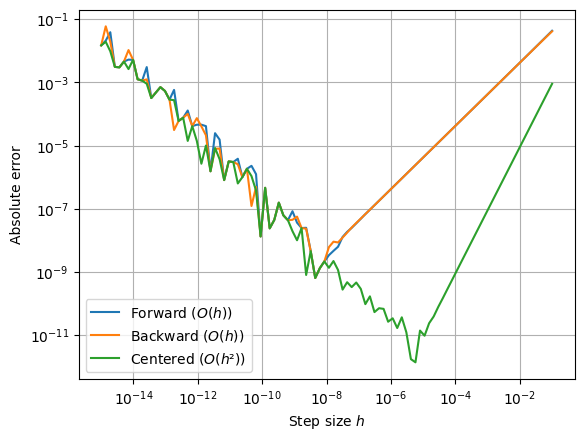

In [21]:
# 测试点
x0 = 1.0
true_derivative = np.cos(x0)  # 真实导数值

# 不同步长下的误差
h_values = np.logspace(-15, -1, 100)
errors_forward = []
errors_backward = []
errors_centered = []

for h in h_values:
    errors_forward.append(abs(forward_diff(f, x0, h) - true_derivative))
    errors_backward.append(abs(backward_diff(f, x0, h) - true_derivative))
    errors_centered.append(abs(centered_diff(f, x0, h) - true_derivative))

# 绘图显示误差随h的变化
plt.loglog(h_values, errors_forward, label='Forward ($O(h)$)')
plt.loglog(h_values, errors_backward, label='Backward ($O(h)$)')
plt.loglog(h_values, errors_centered, label='Centered ($O(h²)$)')
plt.xlabel('Step size $h$')
plt.ylabel('Absolute error')
plt.grid(True)
plt.legend()
plt.show()

### 如何选择 h | How to choose $h$

We want to choose $h$ as small as possible to reduce the **truncation error.**
However, we also need to consider the **rounding error.**

If $h$ is too small, we might get: `float(x + h) == float(x)`

If the function $f$ varies slowly: `float(f(x + h)) == float(f(x))`


---

Let $f_h^{(1)}(x)$ be the approximation of $f^{(1)}(x)$ using the mesh size $h$:

$$f_h^{(1)}(x)=\frac{f(x+h)-f(x)}{h}$$

If we suppose that $f^{(2)}$ is bounded for all $x$ in the domain of application:

$$|f^{(2)}(x)|\leq M$$

then we get the following bound for the truncation error $-\frac{\mathbf{h}}{2}\mathbf{f}^{(2)}(\xi)$：

$$|f_h^{(1)}(x)-f^{(1)}(x)|\leq\frac{h}{2}M$$

> $f_h$ 是一个近似。

---

The truncation error bound $\frac{hM}{2}$ suggests that we can reach any arbitrary precision by choosing $h$ sufficiently small.
However, in floating-point arithmetic it is not possible to evaluate $f_h^{(1)}(x)$ exactly, due to **float rounding errors.**

Suppose that the rounding error for evaluating $f(x)$ has the following bound:
> 假设计算 $f(x)$ 的舍入误差有以下界限

$$|\mathrm{float}(f(x))-f(x)|\leq\varepsilon$$

Then the rounding error for a **forward-difference** approximation is bounded by:
> 那么**前向差分**近似的舍入误差界限为：

$$\left|\mathrm{float}(f_h^{(1)}(x))-f_h^{(1)}(x)\right|=\left|\frac{\mathrm{float}\left(f(x+h)\right)-f(x+h)}{h}-\frac{\mathrm{float}(f(x))-f(x)}{h}\right|\leq\frac{2\varepsilon}{h}$$

> $|a - b|\le |a| + |b|$

Combining both error bounds, we obtain:

$$\left|\mathrm{float}\left(f_h^{(1)}(x)\right)-f^{(1)}(x)\right|\leq\frac{2\varepsilon}{h}+\frac{M}{2}h$$

> $|\text{float}(f_h^{(1)}(x)) - f_h^{(1)}(x) + f_h^{(1)}(x) - f^{(1)}(x)|$<br>
> $|a + b| \le |a| + |b|$

One needs to find a compromise between reducing the **truncation error** and reducing the **rounding error**
> 我们需要在减小截断误差和减小舍入误差之间找到折衷方案。

Note that $h$ can be represented without rounding error if we choose it as a power of 2.
> 如果我们将 $h$ 选择为 2 的幂，则它可以无舍入误差地表示。


---

We can minimize the bound（前向差分） $\color{yellow}b(h)=\frac{2\varepsilon}{h}+\frac{hM}{2}$（总误差） as a function of $h$:
> 理论最优 $h$

$$b^{(1)}(h)=-\frac{2\varepsilon}{h^2}+\frac{M}{2}=0\quad\Leftrightarrow\quad \color{red}\mathbf{h}=\mathbf{2}\sqrt{\frac{\varepsilon}{M}}$$

If we assume that $M$ is of order 1 and that $\varepsilon$ is the 64-bit machine precision $\varepsilon_1=2.22{\times}10^{-16}=2^{-52}$, we get:

$$\mathbf{h=2.98\times10^{-8}=2^{-25}}$$

---

For **centered difference**（中心差分） approximation, if we assume that $|f^{(3)}(x)|\leq M$ for all $x$ in the domain, the total error bound is $\color{yellow}b(h)=\frac{\varepsilon}{h}+\frac{h^2M}{6}$（总误差）
> 理论最优 $h$

$$b^{(1)}(h)=-\frac{\varepsilon}{h^2}+\frac{Mh}{3}=0\quad\Leftrightarrow\quad \color{red}\mathbf{h}=\left(\frac{3\varepsilon}{\mathbf{M}}\right)^{1/3}$$

If $M$ is of order 1 and $\varepsilon = \varepsilon_1$, we get:

$$\mathbf{h\approx8.7\times10^{-6}\approx1.14\times2^{-17}}$$


---

#### 金融工程实际意义

为什么中心差分更优？

- 允许使用更大的步长（$10^{-6}$ vs $10^{-8}$）
- 对舍入误差更不敏感
- 在实际计算中更稳定

---

#### 例子 | Example

To illustrate the influence of $h$ on the quanlity of the numerical approximation of a derivative function,
$$
f(x)=\cos(x^x)-\sin(e^x)
$$
Its derivative can be computed explicitly:
$$
f^{(1)}(x)=-\sin(x^x)x^x(\log(x)+1)-\cos(e^x)e^x
$$


Let $f_{\color{red}h}^{(1)}(x)$ be the finite-difference approximation of $f^{(1)}(x)$.<br>
To measure the quality of the approximation, we can compute the relative error between the two:
$$
\left|\frac{f_{\color{red}h}^{(1)}(x)- f^{(1)}(x)}{f^{(1)}(x)}\right|
$$

$\color{red}\text{In general, the exact derivative } f^{(1)}(x) \text{ is unknown}$

We investigate the accuracy of the forward-difference and centered difference approximations at the points `x = 1.77` and `x = 2.31`

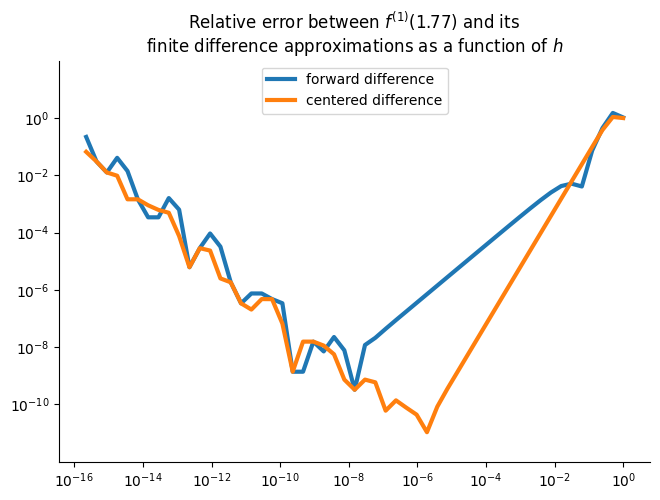

In [ ]:
x = 1.77
h = 2.0**np.arange(-52,1,1)

def f(x):
    return np.cos(x**x)-np.sin(np.exp(x))

def f1(x):
    return -np.sin(x**x)* x**x * (np.log(x)+1) - np.cos(np.exp(x)) * np.exp(x)

(f_x, f1_x, f_x_plus_h, f_x_minus_h) = (f(x), f1(x), f(x+h), f(x-h))
f1_forward_diff = (f_x_plus_h - f_x) / h                # forward-difference approximation
f1_centered_diff = (f_x_plus_h - f_x_minus_h) / (2*h)   # centered-difference approximation

fig, ax = plt.subplots(1)
ax.loglog(h,np.abs((f1_forward_diff-f1_x)/f1_x), label='forward difference', linewidth=3)
ax.loglog(h,np.abs((f1_centered_diff-f1_x)/f1_x), label='centered difference', linewidth=3)
ax.set_xticks(10.0**np.arange(-16,1,2))
ax.set_yticks(10.0**np.arange(-10,1,2))
ax.set_ylim([10**(-12),100.0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Relative error between $f^{(1)}('+str(x)+')$ and its \nfinite difference approximations as a function of $h$')
ax.legend(loc='upper center')   
fig.tight_layout(pad=0)
plt.subplots_adjust()
plt.show()


##### 观察

- There is an optimal $h^*$ which best balances the truncation error and the rounding error.
  - If $h > h^*$, the truncation error dominates
  - If $h < h^*$, the rounding error dominates
  - The centered difference approximation is better than the forward and backward difference approximation due to its lower truncation error
  - The optimal $h^*$ is lower for forward/backward difference than for centered difference because of their greater truncation error


---

## 测量逼近误差 | Measuring approximation errors

How to measure the error between a value $x$ and an approximation $\hat{x}$?

### 绝对误差 | Absolute Error

$$\|x - \hat{x}\|$$

- If $x = 2$ and $\hat{x} = 3$,  then the absolute error is $1$.
- If $x = 10^9$ and $\hat{x} = 10^9 + 1$,  then the absolute error is $1$.

However, the error can be deemed "smaller" than in the previous example.

### 相对误差 | Relative error

$$\frac{\|x - \hat{x}\|}{\|x\|}$$

- If $x = 2$ and $\hat{x} = 3$, the relative error is $0.5$.
- If $x = 10^9$ and $\hat{x} = 10^9 + 1$, the relative error is $10^{-9}$.

> Note that the relative error is only defined if $x\ne 0$

### 结合使用

$$\frac{\|x - \hat{x}\|}{\|x\| + 1}$$

It avoids the problems of the relative error when $x$ is near zero
- It behaves like the relative error when $\|x\| \gg 1$
- It behaves like the absolute error when $\|x\| \ll 1$




---

## 数值不稳定与病态问题 | Numerical instability and ill-conditioning

If the quality of a numerical solution is not acceptable, it is important to distinguish between the following two situations:

- Numerical instability (数值不稳定性): Errors are amplified by the algorithm
  - 误差被算法放大
-  Ill-conditioned problem (病态问题): Small perturbations of the data generate large changes in the solution
   -  数据的微小扰动会导致解的剧烈变化











There is a loss of significant digits when subtracting two large numbers.
> $\color{yellow}\text{两个相近的大数相减导致有效数字丢失}$

The direct algorithm amplifies the rounding error: it is a numerically unstable algorithm.
> 直接算法放大了舍入误差，成为数值不稳定算法

### 条件数 | Condition number

在数值分析中，用于量化一个问题本身（而非解决该问题的算法）对输入数据中微小扰动的敏感度。

- 一个良态（well-conditioned）的问题：输入数据的微小变化只会引起解的微小变化。
- 一个病态（ill-conditioned）的问题：输入数据的微小变化会导致解的剧烈变化。

---

#### 第一部分：一般函数的条件数 | Condition Number of a General Function

对于一个将n维向量映射到n维向量的函数 $f:\mathbb{R}^n\to\mathbb{R}^n$，我们想知道在输入点 $x$ 附近，输入的相对误差会被放大多少倍成为输出的相对误差。

##### 1. 基本定义

其相对条件数（relative condition number）定义为：
$$
\mathrm{cond}(f,x)=\lim_{\varepsilon\to0}\sup_{\|\Delta x\|\leq\varepsilon\|x\|}\frac{\|f(x+\Delta x)-f(x)\|}{\varepsilon\|f(x)\|}
$$
- 分母 $\varepsilon \|x\|$ - 衡量了输入扰动 $\Delta x$ 的“大小”（相对于原始输入 $x$）
- 分子 $\|f(x+\Delta x)-f(x)\|$ - 衡量了由输入扰动引起的输出变化。
- 这个比值描述了：输出的相对变化 与 输入的相对变化 的 比率。
- $\sup$ 和 $\lim$ 表示我们考虑的是在 无穷小 扰动下的 最坏情况 放大率。

##### 2. 可微函数的简化形式 | The Practical Formula for Differentiable Functions

如果函数 $f$ 在 $x$ 处是可微的，这个抽象的定义可以简化为一个更实用的公式：
$$
\mathrm{cond}(f,x)=\frac{\|x\|\|J(x)\|}{\|f(x)\|}
$$
- $J(x)$ 是 $f$ 在 $x$ 处的雅可比矩阵（包含所有一阶偏导数）。矩阵范数 $\|J(x)\|$ 衡量了这个线性变换的最大“拉伸”能力。
- $\color{yellow}\text{在可微的情况下，条件数由函数在该点的导数（或雅可比矩阵）主导。}$
    > For a differentiable function, the condition number is governed by its derivative (Jacobian) at that point.
- 导数越大，意味着函数在该点越“陡峭”，输入的小扰动就会被放大得越厉害，条件数也就越大。
    > A large derivative means the function is "steep," so small input changes are amplified into large output changes, leading to a large condition number.

##### 3. 标量函数的特例 | The Special Case of Scalar Functions

当 $f$ 是标量函数（$n = 1$）时， 雅可比矩阵退化为导数 $f'(x)$，公式进一步简化为：
$$
\mathrm{cond}(f,x)=\left|\frac{xf^{\prime}(x)}{f(x)}\right|
$$

例子：

- $f(x)=e^x$：$\quad\mathrm{cond}(\exp,x)=|x\cdot e^x/e^x|=|x|$。
  - 当 $|x|$ 很大时，问题呈病态。
- $f(x)=\log(x)$：$\quad\mathrm{cond}(\log,x)=|x\cdot(1/x)/\log(x)|=1/|\log(x)|$。
  - 当 $x$ 接近 $1$ 时，分母 $|\log(x)|$ 很小，条件数很大，问题病态。这解释了为什么在 $x = 1$ 附近计算对数需要特别小心。


---

#### 第二部分：矩阵的条件数与线性系统 | The Condition Number of a Matrix and Linear Systems

##### 1. 矩阵条件数的定义 | Definition of the Matrix Condition Number

源于对线性系统扰动分析的结果。
> It is derived from the perturbation analysis of the linear system.

$$
\kappa(A)=\|A\|\|A^{-1}\|
$$

考虑扰动后的系统 $(A+\Delta A)(x+\Delta x)=b$，可以证明解的相对误差满足：
$$
\frac{\|\Delta x\|}{\|x\|}\lesssim\kappa(A)\left(\frac{\|\Delta A\|}{\|A\|}\right)
$$

矩阵的条件数 $\kappa(A)$ 直接放大了输入数据（矩阵 $A$ 中的相对误差，使其成为解 $x$ 中的相对误差。


##### 2. 几何解释：拉伸与压缩 | The Geometric Interpretation: Stretching and Shrinking

矩阵的范数 $\|A\|$：
$$
\|A\|=\max_{x\neq0}\frac{\|Ax\|}{\|x\|}
$$
衡量了矩阵 $A$ 能将一个向量“拉伸”的最大倍数。
> It measures the maximum factor by which $A$ can "stretch" a vector.

类似地，我们可以找到矩阵 $A$ 能将一个向量“压缩”的最小倍数：
$$
\min_{x\ne 0}\frac{\|Ax\|}{\|x\|}=\min_y\frac{\|y\|}{\|A^{-1}y\|}=\frac{1}{\max_y\frac{\|A^{-1}y\|}{\|y\|}}=\frac{1}{\|A^{-1}\|}
$$

条件数（The condition number） $\kappa(A)$ 可以解释为：
$$
\kappa(A)=\frac{\|A\|}{\min\frac{\|Ax\|}{\|x\|}}=\frac{\text{矩阵 }A\text{ 的最大拉伸倍数}}{\text{矩阵 }A\text{ 的最小拉伸倍数}}
$$
- 一个高条件数的矩阵，意味着它在某些方向上拉伸得很厉害，在另一些方向上却压缩得很厉害，就像一个又长又薄的椭圆。
> A high condition number means the matrix acts like a long, thin ellipse: it stretches vectors immensely in some directions and shrinks them drastically in others.

##### 3. 与奇异值的关系 | The Link to Singular Values

矩阵 $A$ 的奇异值 $\sigma_i$ 直接代表了它在各个主轴方向上的拉伸因子。
> The singular value decomposition (SVD) provides the clearest picture. The singular values $\sigma_i$ of $A$ are the stretching factors along its principal axes.

- 最大奇异值 $\sigma_{\text{max}}$ 就是 $\|A\|$ 。
- 最小奇异值 $\sigma_{\text{min}}$ 就是 $\frac{1}{\|A^{-1}\|}$ 。

因此，矩阵的条件数等于：
$$
\kappa(A)=\frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}
$$

- 如果 $\sigma_{\min}$ 非常小，即使 $A$ 在理论上是可逆的，它在对应方向上几乎是一个“扁平”的映射。任何在这个方向上的微小扰动（来自 $A$ 或 $b$ 都会被极大地放大，导致解 $x$ 发生巨大变化。
- $\color{yellow}\text{一个近乎奇异的矩阵，其条件数必然非常大。}$








$$

In [23]:
A = np.array([[.780, .563], [.913, .659]])
print(np.linalg.cond(A))

2193218.99965077


In [24]:
(U, S, V) = np.linalg.svd(A)
print(S[0] / S[1])

2193218.99965077


#### 总结与关联 | Summary and Critical Distinctions

无论是函数还是矩阵，条件数都是一个“放大因子”，它衡量了输入误差对输出结果的影响程度。
> Whether for a function or a matrix, the condition number is an "amplification factor" for relative errors from input to output.

- $\color{yellow}\text{条件数}$ 描述的是 $\color{yellow}\text{问题本身}$ 的固有属性（如矩阵 $A$ 的特性）。
- $\color{yellow}\text{数值稳定性}$ 描述的是算法在处理该问题时，是否会放大舍入误差。
- $\color{yellow}\text{一个病态的问题（高条件数），即使用一个稳定的算法，也可能得到不准确的结果。}$ 因为问题本身就对误差极度敏感。
    > An ill-conditioned problem (high condition number) will yield an inaccurate solution, even with a perfectly stable algorithm.

实践意义：<br>
在求解 $Ax=b$ 时，如果计算出矩阵 $A$ 的条件数 $\kappa(A)$ 非常大，我们就应该警惕：<br>
即使得到一个解，这个解也可能因为舍入误差而不可靠。在这种情况下，可能需要寻求正则化（regularization）等专门技术来处理病态问题，而不是指望一个更好的算法。

A large condition number can cause additional float-rounding errors when solving the problem.
> As a rule of thumb, if $\kappa(A) = 10^p$, then $p$ digits are lost in floating-point arithmetic.


---

## 算法复杂度 | Complexity of algorithms

The order of the computational complexity of algorithms: big O notation. $\mathcal{O}(n)$

A funtion $f(n)$ is $\mathcal{O}(g(n))$ if there exist constant $c_0$ and $n_0$ such that,
$$
|f(n)|{\leq}c_0|g(n)|\quad\mathrm{for~all}\quad n{\geq}n_0
$$

---

$c > 0$ is some arbitrary constant.

<img src="./image/complexity.png" alt="image.png" style="width: 700px; height: auto; display: block; margin: 0 auto;"><br>

- Quicksort - $\mathcal{O}(n\log(n))$
- Bubblesort - $\mathcal{O}(n^2)$
